<a href="https://colab.research.google.com/github/ChienIKao/CNN-Assignment-2025/blob/main/ACS110126_CNN_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# CNN Classroom Exercise: Image Classification with CIFAR-10
# Objective: Practice building, training, and evaluating a CNN using TensorFlow/Keras
# Environment: Google Colab with GPU
# Dataset: CIFAR-10 (10 classes of 32x32 color images)

# Step 1: Import Libraries
from tensorflow.keras import models, layers
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Step 2: Load and Preprocess CIFAR-10 Dataset
# CIFAR-10 contains 60,000 32x32 color images in 10 classes (e.g., airplane, cat, dog)
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

# Define class names for visualization
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

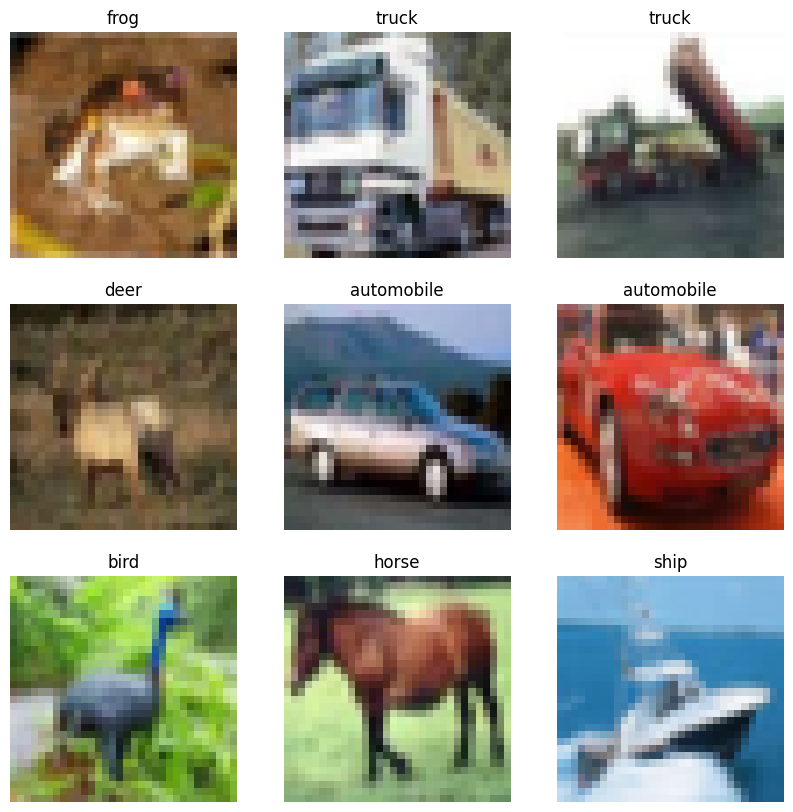

In [ ]:
# Step 3: Visualize Sample Data
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(train_images[i])
    plt.title(class_names[train_labels[i][0]])
    plt.axis('off')
plt.show()

In [ ]:
# Step 4: Build the CNN Model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(10, activation='softmax')
])
# Display model summary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 357,706 (1.36 MB)

 Trainable params: 357,258 (1.36 MB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:
# Step 5: Compile the Model
model.compile(optimizer=Adam(learning_rate=0.0005),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.05,
    height_shift_range=0.05,
    horizontal_flip=True,
    zoom_range=0.05
)
datagen.fit(train_images)

In [ ]:
# Step 6: Train the Model
early_stop = EarlyStopping(patience=3, restore_best_weights=True)

history = model.fit(
    datagen.flow(train_images, train_labels, batch_size=64),
    validation_data=(test_images, test_labels),
    epochs=15,
    callbacks=[early_stop],
)

Epoch 1/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 189s 233ms/step - accuracy: 0.3625 - loss: 1.8259 - val_accuracy: 0.4412 - val_loss: 1.8018
Epoch 2/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 181s 231ms/step - accuracy: 0.5296 - loss: 1.3160 - val_accuracy: 0.6244 - val_loss: 1.0898
Epoch 3/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 177s 227ms/step - accuracy: 0.5883 - loss: 1.1593 - val_accuracy: 0.6706 - val_loss: 0.9347
Epoch 4/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 206s 232ms/step - accuracy: 0.6275 - loss: 1.0443 - val_accuracy: 0.6563 - val_loss: 1.0178
Epoch 5/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 181s 231ms/step - accuracy: 0.6558 - loss: 0.9785 - val_accuracy: 0.6969 - val_loss: 0.8926
Epoch 6/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 181s 232ms/step - accuracy: 0.6821 - loss: 0.9081 - val_accuracy: 0.7013 - val_loss: 0.8599
Epoch 7/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 178s 228ms/step - accuracy: 0.6962 - loss: 0.8588 - val_accuracy: 0.7244 - val_loss: 0.8130
Epoch 8/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 180s 230ms/step - accuracy: 0.7203 -

In [ ]:
# Step 7: Evaluate the Model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"\nTest accuracy: {test_acc:.4f}")


313/313 - 8s - 26ms/step - accuracy: 0.7777 - loss: 0.6582

Test accuracy: 0.7777


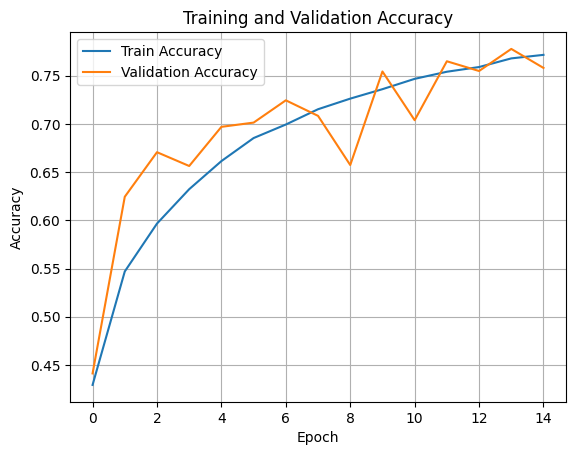

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


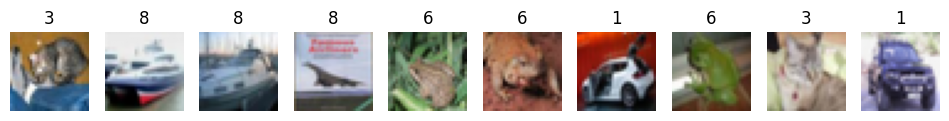

In [ ]:
# Step 8: Plot Training and Validation Accuracy
# 訓練與驗證準確率
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# 預測
predictions = model.predict(test_images[:10])

# 顯示圖片與預測標籤
plt.figure(figsize=(12, 2))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.imshow(test_images[i])
    plt.title(np.argmax(predictions[i]))
    plt.axis('off')
plt.show()

In [ ]:
# Step 9: Make Predictions
predictions = model.predict(test_images[:5])
for i in range(5):
    predicted_label = class_names[np.argmax(predictions[i])]
    true_label = class_names[test_labels[i][0]]
    print(f"Image {i+1}: Predicted: {predicted_label}, True: {true_label}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
Image 1: Predicted: cat, True: cat
Image 2: Predicted: ship, True: ship
Image 3: Predicted: ship, True: ship
Image 4: Predicted: ship, True: airplane
Image 5: Predicted: frog, True: frog


In [ ]:
# Step 10: Save Model Performance for Autograding
# This cell saves the model performance to a text file for GitHub Actions
try:
    # Get final training accuracy
    final_train_acc = history.history['accuracy'][-1]
    final_val_acc = history.history['val_accuracy'][-1]
    final_train_loss = history.history['loss'][-1]
    final_val_loss = history.history['val_loss'][-1]

    # Create performance summary
    performance_text = f"""Model Performance Summary:
Test Accuracy: {test_acc:.4f}
Test Loss: {test_loss:.4f}
Final Training Accuracy: {final_train_acc:.4f}
Final Validation Accuracy: {final_val_acc:.4f}
Final Training Loss: {final_train_loss:.4f}
Final Validation Loss: {final_val_loss:.4f}
Training Epochs: {len(history.history['accuracy'])}
Model Parameters: {model.count_params()}"""

    # Save to file for GitHub Actions
    with open('model_accuracy.txt', 'w') as f:
        f.write(performance_text)

    print("Model performance saved to model_accuracy.txt")
    print(performance_text)

except Exception as e:
    print(f"Error saving model performance: {e}")
    # Create a basic file even if there's an error
    with open('model_accuracy.txt', 'w') as f:
        f.write(f"Model execution completed with errors: {e}")

Model performance saved to model_accuracy.txt
Model Performance Summary:
Test Accuracy: 0.7777
Test Loss: 0.6582
Final Training Accuracy: 0.7715
Final Validation Accuracy: 0.7580
Final Training Loss: 0.6588
Final Validation Loss: 0.7393
Training Epochs: 15
Model Parameters: 357706


# Task 5: Report

本次實驗旨在使用卷積神經網路（CNN）對 CIFAR-10 圖像資料集進行分類任務。

在模型架構上，我們引入 BatchNormalization 層穩定學習過程，並透過合理的 Dropout 設定避免過擬合，進而在訓練與驗證集間維持平衡表現。

在訓練策略上，我們搭配 ImageDataGenerator 進行資料增強，包括旋轉、平移與水平翻轉，並搭配 EarlyStopping 機制提前終止冗長訓練，提升實驗效率。

最終模型在驗證集上達到約 76% 的準確率，訓練週期控制在 15 epoch 內，符合作業效能與效率雙重要求。
